Catalina Gonzalez A01720376

Final Presentation of TOEFL Grades

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


# Description of Data Set

This dataset shows the scores in the different sections of the TOEFL exam (english examn) by sex. It also shows if they took a preparation test, their ethnicitygroup the education level of their parents, 

# Functions Used

* rename()
* .drop()
* .plot()
* pivot table:
* .figure()

# Variables

* reading score: numerical
* writing score: numerical
* math score: numerical
* education level: categorical
* test preparation: categorical
* ethnicity group: categorical

In [25]:
import seaborn as sns 
import statsmodels.api as sm
from sklearn import linear_model

In [26]:
df = pd.read_csv('StudentGrades.csv') 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
df.rename(columns = {'gender': 'sex',
                     'race/ethnicity' : 'ethnicity group',
                     'parental level of education' : 'education level'},
          inplace = True)

#df.rename() estamos remplazando el nombre de las columnas

df.head()

,sex,ethnicity group,education level,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
df.drop('lunch', axis =1)

,sex,ethnicity group,education level,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95
996,male,group C,high school,none,62,55,55
997,female,group C,high school,completed,59,71,65
998,female,group D,some college,completed,68,78,77


## Q1 Does education level have an effect on the scores? Get the median

In [29]:
pivot1=pd.pivot_table(df,
    index='education level',
    aggfunc='median',
    values=['math score','reading score','writing score'], margins=True,
)
pivot1

,math score,reading score,writing score
education level,,,
associate's degree,67.0,72.5,70.5
bachelor's degree,68.0,73.0,74.0
high school,63.0,66.0,64.0
master's degree,73.0,76.0,75.0
some college,67.5,70.5,70.0
some high school,65.0,67.0,66.0
All,66.0,70.0,69.0


In [30]:
pivot1=pivot1.drop(['All'], axis= 0)

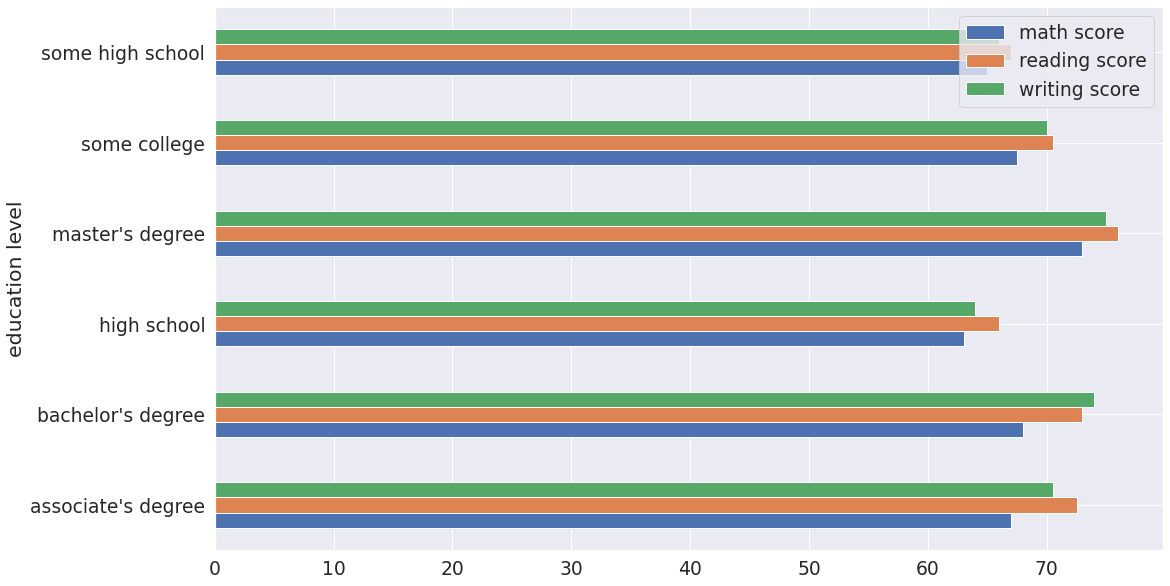

In [31]:
pivot1.plot(kind = 'barh', figsize = (17,10))

# Conclusion 1: 
There's a correlation between the scores of the children and their parents. The master's degree is higher in score. 

## Q2 Between female and male, which has the best scores in both reading and writing?

In [33]:
pivot2=pd.pivot_table(df,
                   index = 'sex',
                   aggfunc ='mean',
                   values=['writing score','reading score'],
                   margins = True,
                  )
pivot2

,reading score,writing score
sex,,
female,72.608108,72.467181
male,65.473029,63.311203
All,69.169000,68.054000


In [34]:
pivot2=pivot2.drop(['All'],axis = 0)

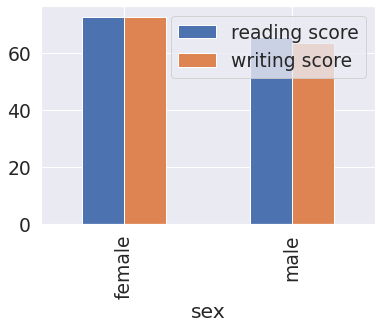

In [35]:
pivot2.plot(kind = 'bar')

# Conclusion 2: 
Bewteen both sexes, we can see that females have a higher score in both sections. 

## Q3 Does the ethnicity group have an effect on the score of math?

In [36]:
pivot3=pd.pivot_table(df,

    index='ethnicity group', 
    aggfunc='mean', 
    values=['math score'],
    margins=True,
    )

pivot3

,math score
ethnicity group,
group A,61.629213
group B,63.452632
group C,64.463950
group D,67.362595
group E,73.821429
All,66.089000


In [37]:
pivot3 = pivot3.drop(['All'], axis = 0)

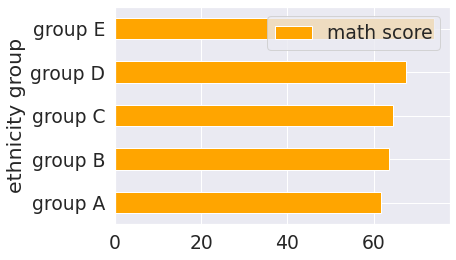

In [38]:
pivot3.plot(kind = 'barh', color = 'orange')

# Conclusion 3: 
The Group E has better scores in the math section!

## Q4 Does a correlation exist between the most difficul sections of the exam? (Math and Reading)

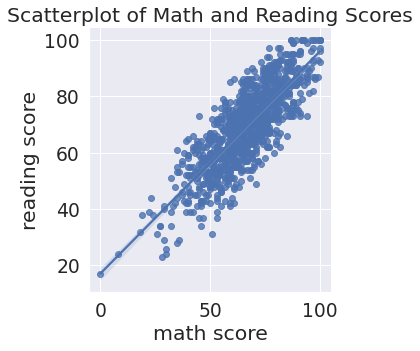

In [39]:
sns.lmplot(x= 'math score',
           y= 'reading score',
           data = df,)
plt.title('Scatterplot of Math and Reading Scores')
plt.show()

# Conclusion 4:
Theres a correlation between both sections in scores. 

In [40]:
import statsmodels.api as sm 

## Q5 Which is the range between all section scores?

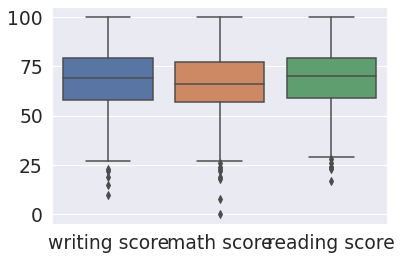

In [41]:
sns.boxplot(data = df.loc[:, ['writing score', 'math score', 'reading score']],
           )

# Conclusion 5: 
In the box plot charts we can see the range in scores. The outliers can be seen too, the black dots.

## Q6 Using regression, which is the impact of ethnicitygroup in the math section?

In [42]:
df = df.rename(columns = {'math score': 'mathscore'})
df = df.rename(columns = {'ethnicity group': 'ethnicitygroup'})
df['ethnicitygroup'] = df.ethnicitygroup.replace({'group A':1,'group B':2, 'group C':3, 'group D':4,'group E':5})

df

,sex,ethnicitygroup,education level,lunch,test preparation course,mathscore,reading score,writing score
0,female,2,bachelor's degree,standard,none,72,72,74
1,female,3,some college,standard,completed,69,90,88
2,female,2,master's degree,standard,none,90,95,93
3,male,1,associate's degree,free/reduced,none,47,57,44
4,male,3,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,5,master's degree,standard,completed,88,99,95
996,male,3,high school,free/reduced,none,62,55,55
997,female,3,high school,free/reduced,completed,59,71,65
998,female,4,some college,standard,completed,68,78,77


In [43]:
modelA = sm.OLS.from_formula('mathscore ~ ethnicitygroup', data = df)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mathscore   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     49.04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           4.61e-12
Time:                        07:03:28   Log-Likelihood:                -4113.3
No. Observations:                1000   AIC:                             8231.
Df Residuals:                     998   BIC:                             8240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         57.0882      1.368     41.731      0.000      54.404      59.773
ethnicitygroup     2.8358      0.405      7.003      0.000       2.041       3.630
==============================================================================
Omnibus:                       19.531   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.847
Skew:                          -0.306   Prob(JB):                     2.97e-05
Kurtosis:                       3.356   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

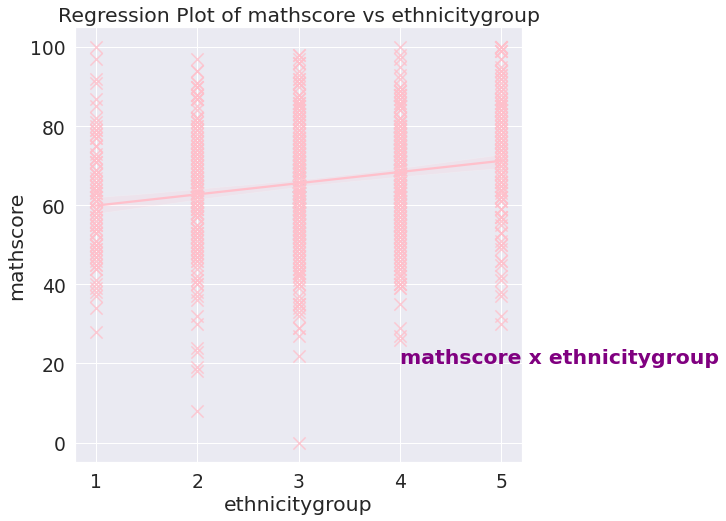

In [44]:
plt.figure(figsize = (8,8)) 
sns.set(font_scale = 1.7)
reg_plot = sns.regplot(x = 'ethnicitygroup', 
                        y = 'mathscore',
                        data = df,
                        marker = 'x',
                        color = 'pink', scatter_kws = {'s':150} 
                      )
reg_plot.set_title('Regression Plot of mathscore vs ethnicitygroup') 
reg_plot.text(4, 20, 'mathscore x ethnicitygroup',
                color = 'purple', 
                weight = 'semibold', 
                size = 'medium'
             )

plt.show()

# Conclusion 6:
The model doesn't seem that efficent to analyze the mathscore. Maybe the solution to this can be to include more variables. 

In [52]:
import matplotlib as mpl

In [53]:
counts = df['ethnicitygroup'].value_counts()

In [54]:
counts

3    319
4    262
2    190
5    140
1     89
Name: ethnicitygroup, dtype: int64

In [55]:
type(counts)
counts = counts.to_frame()
type (counts)

pandas.core.frame.DataFrame

# Q7 Which are the percentages of the ethnicity groups?

In [56]:
counts['%'] = (counts.iloc[:,:]/counts.loc[:,'ethnicitygroup'].sum(axis=0))*100

In [57]:
counts

,ethnicitygroup,%
3,319,31.9
4,262,26.2
2,190,19.0
5,140,14.0
1,89,8.9


# Conclusion 7:
Using the knowledge learned in class, I got the percentages above.

# Q8 Between Writing and Math, which section has a higher percentage?

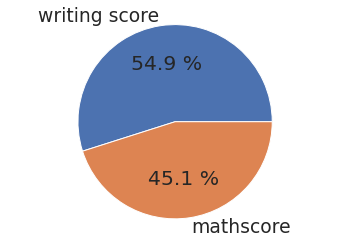

In [45]:
Posesion = [31.9,26.2]
nombres = ["writing score","mathscore"]
posplot = plt.pie(Posesion, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

# Conclusion 8:
In the pie chart we can see that Writing has a much higher percentage. 